In [1]:
#pip install spacerocks

In [1]:
cd /home/jiamingp

/home/jiamingp


In [2]:
pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 31.5 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3
    Uninstalling pip-21.3:
      Successfully uninstalled pip-21.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacerocks==1.0.23

  Using cached spacerocks-1.0.23-cp38-cp38-linux_x86_64.whl
  Attempting uninstall: spacerocks
    Found existing installation: spacerocks 1.1.5
    Uninstalling spacerocks-1.1.5:
      Successfully uninstalled spacerocks-1.1.5
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install spacerocks #--upgrade

  Using cached spacerocks-1.1.0.tar.gz (36.7 MB)
  ERROR: Command errored out with exit status 1:
   command: /usr/local/anaconda/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-356xuxy7/spacerocks_cc4cc45bd424453796ad141d3f236274/setup.py'"'"'; __file__='"'"'/tmp/pip-install-356xuxy7/spacerocks_cc4cc45bd424453796ad141d3f236274/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-rl1_vp8l
       cwd: /tmp/pip-install-356xuxy7/spacerocks_cc4cc45bd424453796ad141d3f236274/
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.8
  creating build/lib.linux-x86_64-3.8/spacerocks
  copying spacerocks/jacobians.py ->

In [4]:
import spacerocks

In [5]:
from spacerocks import SpaceRock

In [7]:
#import spacerocks
#import SpaceRock
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
import numpy as np
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u
import easyaccess as ea
import matplotlib.pyplot as plt
from DEEP_pointings import DEEP_fields_2019, DEEP_fields_2020
from compute_chip import compute_chip

In [8]:
#dfo = pd.read_json('https://minorplanetcenter.net/Extended_Files/mpcorb_extended.json.gz')
#dfo.to_csv('mpcorb_extended.csv', index=None)
dfo = pd.read_csv('mpcorb_extended.csv')

In [9]:
df = dfo.loc[dfo.Orbit_type=="Jupiter Trojan"]
df.to_csv('mpcorb_JT.csv', index=None)
print(len(df))

10437


In [3]:
from matplotlib.patches import Ellipse

class DECamField(object):
#
    def __init__(self, pos):
        self.ra = pos.ra.deg
        self.dec = pos.dec.deg

    def ellipse(self):
        # An approximation to the DECam field of view, suitable e.g. for plotting
        semimajor_deg = 1.08
        semiminor_deg = 0.98
        center = (self.ra, self.dec)
        rotation = 0
        return Ellipse(center, 2*semimajor_deg, 2*semiminor_deg, rotation, fill=False, ec='k')
    
    def contains(self, ra1, dec1):
        # returns True if the point (ra1, dec1) lies inside the field
        radiff = ra1-self.ra
        if radiff > 360: radiff -= 2*360
        return radiff**2/1.08**2 + (dec1-self.dec)**2/0.98**2 <= 1.0

In [4]:
def give_ccd(date,expnum,pointings):
    df = dfo.loc[dfo.Orbit_type=="Jupiter Trojan"]
    rocks = SpaceRock(a=df.a.values, 
                  e=df.e.values, 
                  inc=df.i.values, 
                  arg=df.Peri.values, 
                  node=df.Node.values, 
                  t_peri=df.Tp.values, 
                  epoch=df.Epoch.values,
                  H=df.H.values, 
                  name=df.Principal_desig.values.astype(str),
                  precise=False,
                  coordinates='keplerian',
                  angles='degrees',
                  frame='heliocentric',
                  obscode='W84')
    dates = Time(date, format='iso', scale='utc')
    prop1 = rocks.propagate(dates.jd, model=1)
    obs1o = prop1.observe('W84')
    df['ra'] =obs1o.ra.deg 
    df['dec'] =obs1o.dec.deg 
    df['expnum']=expnum
    ccd = []
    for ind, row in df.iterrows():
            target_pos = SkyCoord(row['ra'], row['dec'], frame='icrs', unit=(u.deg, u.deg))
            ccdnam, ccdnum = compute_chip(target_pos.ra.radian, target_pos.dec.radian, pointings.ra.radian, pointings.dec.radian)
            ccd.append(ccdnum)
    df['ccd'] = ccd
    df2 = df.loc[df.ccd>0]
    return df2

### Get reliable JTs from DES

In [10]:
desjt = pd.read_csv('DES_Trojans_mpc(2).csv')
despo = pd.read_csv('DES pointing/DES_Y6A1_exposures.csv')

143

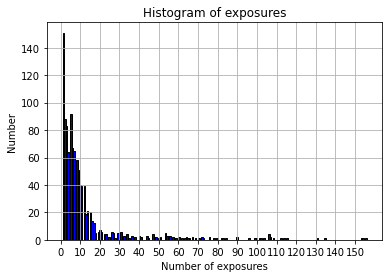

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#This is nubmer of exposures for each objects
nume = desjt.groupby('Principal_desig').size()
#plot histogram for that.
plt.hist(nume, color = 'blue', edgecolor = 'black',bins = 200)
plt.title('Histogram of exposures')
plt.xlabel('Number of exposures')
plt.ylabel('Number')
plt.xticks(np.arange(0, max(nume), 10.0))
plt.grid()
#np.average(nume[nume<20])
len(nume[nume>20])
#Looks to have many JTs with 6 exposures.
#Many JTs with > 20 exposures 

In [12]:
len(nume[nume==1])

151

In [13]:
len(nume[nume>20])

143

### Plot band per objects

86

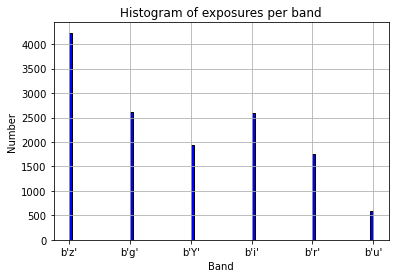

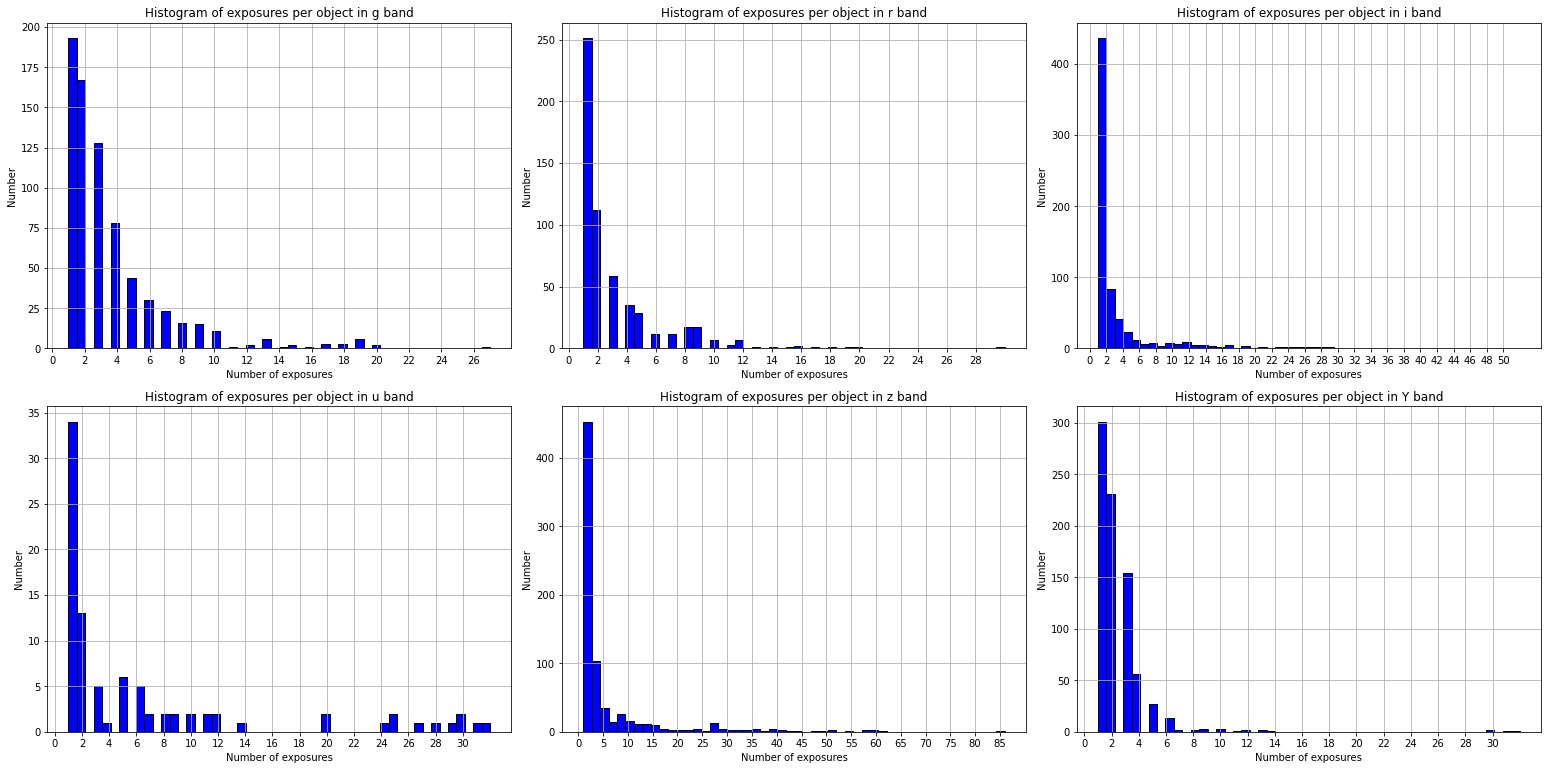

In [14]:
desjt = pd.read_csv('DES_Trojans_mpc(2).csv')
bande = desjt.groupby('BAND').size()
#plot histogram for that.
plt.figure(figsize=(6,4),frameon=False)
plt.hist(desjt['BAND'], color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of exposures per band')
plt.xlabel('Band')
plt.ylabel('Number')
plt.grid()

plt.figure(figsize=(18*1.2,9*1.2),frameon=False)
ax2=plt.subplot(231)
gband = desjt.loc[desjt['BAND']=="b'g'"]
nume = gband.groupby('Principal_desig').size()
plt.hist(nume, color = 'blue', edgecolor = 'black',bins = 50)
plt.title('Histogram of exposures per object in g band')
plt.xlabel('Number of exposures')
plt.ylabel('Number')
plt.xticks(np.arange(0, max(nume), 2.0))
plt.grid()

ax2=plt.subplot(232)
rband = desjt.loc[desjt['BAND']=="b'r'"]
nume = rband.groupby('Principal_desig').size()
plt.hist(nume, color = 'blue', edgecolor = 'black',bins = 50)
plt.title('Histogram of exposures per object in r band')
plt.xlabel('Number of exposures')
plt.ylabel('Number')
plt.xticks(np.arange(0, max(nume), 2.0))
plt.grid()

ax2=plt.subplot(233)
iband = desjt.loc[desjt['BAND']=="b'i'"]
nume = iband.groupby('Principal_desig').size()
plt.hist(nume, color = 'blue', edgecolor = 'black',bins = 50)
plt.title('Histogram of exposures per object in i band')
plt.xlabel('Number of exposures')
plt.ylabel('Number')
plt.xticks(np.arange(0, max(nume), 2.0))
plt.grid()

ax2=plt.subplot(234)
uband = desjt.loc[desjt['BAND']=="b'u'"]
nume = uband.groupby('Principal_desig').size()
plt.hist(nume, color = 'blue', edgecolor = 'black',bins = 50)
plt.title('Histogram of exposures per object in u band')
plt.xlabel('Number of exposures')
plt.ylabel('Number')
plt.xticks(np.arange(0, max(nume), 2.0))
plt.grid()

ax2=plt.subplot(235)
Yband = desjt.loc[desjt['BAND']=="b'z'"]
nume = Yband.groupby('Principal_desig').size()
plt.hist(nume, color = 'blue', edgecolor = 'black',bins = 50)
plt.title('Histogram of exposures per object in z band')
plt.xlabel('Number of exposures')
plt.ylabel('Number')
plt.xticks(np.arange(0, max(nume), 5.0))
plt.grid()
plt.tight_layout()

ax2=plt.subplot(236)
Yband = desjt.loc[desjt['BAND']=="b'Y'"]
nume = Yband.groupby('Principal_desig').size()
plt.hist(nume, color = 'blue', edgecolor = 'black',bins = 50)
plt.title('Histogram of exposures per object in Y band')
plt.xlabel('Number of exposures')
plt.ylabel('Number')
plt.xticks(np.arange(0, max(nume), 2.0))
plt.grid()
plt.tight_layout()

Yband = desjt.loc[desjt['BAND']=="b'z'"]
nume = Yband.groupby('Principal_desig').size()
max(nume)

Now find objects that can be plotted as g - r, r - i or z - i

In [15]:
goodg = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'g'")]['Principal_desig'].unique()
goodr = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'r'")]['Principal_desig'].unique()
goodi = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'i'")]['Principal_desig'].unique()
goodz = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'z'")]['Principal_desig'].unique()
goodu = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'u'")]['Principal_desig'].unique()
print(len(goodg))
print(len(goodr))
print(len(goodi))
print(len(goodz))
print(len(goodu))

652
507
604
658
82


g-r 462
r-i 456
z-i 524
u-g 19
z-r 416
z-g 489
g-r&r-i 421
g-r&z-i 365
r-i&z-i 395
g-r&z-g 381
g-r&z-r 381


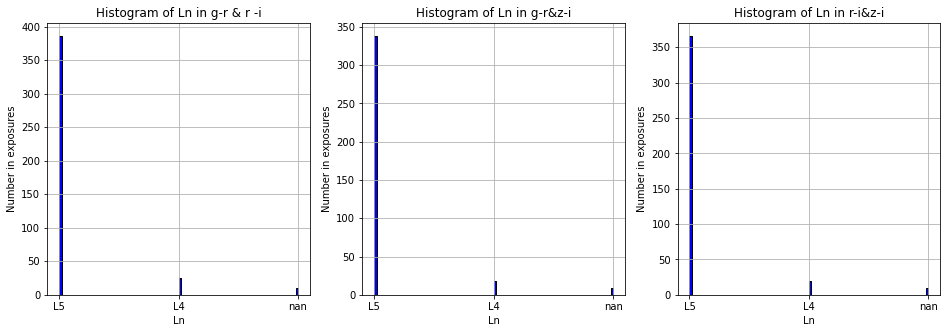

In [16]:
grgood = []
for i in goodg:
    for a in goodr:
        if i == a: 
            grgood.append(i)
print('g-r',len(grgood))

rigood = []
for i in goodi:
    for a in goodr:
        if i == a: 
            rigood.append(i)
print('r-i',len(rigood))

zigood = []
for i in goodz:
    for a in goodi:
        if i == a: 
            zigood.append(i)
print('z-i',len(zigood))

uggood = []
for i in goodu:
    for a in goodg:
        if i == a: 
            uggood.append(i)
print('u-g',len(uggood))

zrgood = []
for i in goodz:
    for a in goodr:
        if i == a: 
            zrgood.append(i)
print('z-r',len(zrgood))

zggood = []
for i in goodz:
    for a in goodg:
        if i == a: 
            zggood.append(i)
print('z-g',len(zggood))

grrigood = []
for i in grgood:
    for a in rigood:
        if i == a: 
            grrigood.append(i)
LL = []
for b in grrigood:
    l = desjt.loc[desjt['Principal_desig'] == b]['Ln'].unique()
    l = l[0]
    LL.append(l)
#print(LL)
print('g-r&r-i',len(grrigood))
plt.figure(figsize=(16,5),frameon=False)
ax2=plt.subplot(131)
plt.hist(LL, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln in g-r & r -i')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

grzigood = []
for i in grgood:
    for a in zigood:
        if i == a: 
            grzigood.append(i)
print('g-r&z-i',len(grzigood))
LL = []
for b in grzigood:
    l = desjt.loc[desjt['Principal_desig'] == b]['Ln'].unique()
    l = l[0]
    LL.append(l)
ax2=plt.subplot(132)
plt.hist(LL, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln in g-r&z-i')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

rizigood = []
for i in rigood:
    for a in zigood:
        if i == a: 
            rizigood.append(i)
print('r-i&z-i',len(rizigood))
LL = []
for b in rizigood:
    l = desjt.loc[desjt['Principal_desig'] == b]['Ln'].unique()
    l = l[0]
    LL.append(l)
ax2=plt.subplot(133)
plt.hist(LL, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln in r-i&z-i')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

grzggood = []
for i in grgood:
    for a in zggood:
        if i == a: 
            grzggood.append(i)
print('g-r&z-g',len(grzggood))

grzrgood = []
for i in grgood:
    for a in zrgood:
        if i == a: 
            grzrgood.append(i)
print('g-r&z-r',len(grzrgood))

In [17]:
# Store some good JTs
goodjt = pd.DataFrame()
goo = []
desjj = desjt.values.tolist()
for i in desjj:
    najt = i[1]
    for j in grzigood:

        if najt == j:
            goo.append(i)
#print(goodjt)
#goodjt[['']]
#print(goo)

In [18]:
goodjt = pd.DataFrame()
exp = []
na =[]
ra=[]
dec=[]
ccd=[]
Band = []
date = []
U = []
delra = []
deldec = []
L = []
for i in goo:
    exp.append(i[0])
    na.append(i[1])
    ra.append(i[2])
    dec.append(i[3])
    ccd.append(i[4])
    Band.append(i[5])
    date.append(i[6])
    U.append(i[7])
    delra.append(i[8])
    deldec.append(i[9])
    L.append(i[11])

In [44]:
#goo

In [45]:
#print(len(goo))
goodjt = pd.DataFrame()
goodjt['expnum','Principal_desig','ra','dec','ccd','BAND','DATE_OBS','U'
,'RA_3sigma'
,'DEC_3sigma'
,'Ln'] = goo
goodjt

,"(expnum, Principal_desig, ra, dec, ccd, BAND, DATE_OBS, U, RA_3sigma, DEC_3sigma, Ln)"
0,"[398230, 1971 FF, 33.36053299832449, 4.0916818..."
1,"[398232, 1971 FF, 33.36066774840785, 4.0918184..."
2,"[229724, 1971 FF, 8.352986116683855, -3.065866..."
3,"[231945, 1971 FF, 7.702020272614733, -3.504680..."
4,"[233119, 1971 FF, 7.399927380969678, -3.696634..."
...,...
8621,"[258896, 2021 JW21, 40.44667858522249, -6.5755..."
8622,"[259343, 2021 JW21, 40.36075921256722, -6.6013..."
8623,"[266566, 2021 JW21, 39.03771336836945, -6.8031..."
8624,"[266567, 2021 JW21, 39.03764062520296, -6.8031..."


In [19]:
goodjt['expnum'] = exp
goodjt['Principal_desig'] =na
goodjt['ra'] = ra
goodjt['dec']=dec
goodjt['ccd']=ccd
goodjt['BAND']=Band
goodjt['DATE_OBS']=date
goodjt['U']=U
goodjt['RA_3sigma']=delra
goodjt['DEC_3sigma']=deldec
goodjt['Ln']=L

goodjt
len(goodjt['Principal_desig'].unique())

365

In [20]:
goodjt.to_csv('DES_GoodTrojans_mpc.csv', index=None)

In [21]:
len(goodjt['Principal_desig'].unique())

365

In [22]:
#The old one
#desjt2 = pd.read_csv('DES JTs/DES_GoodTrojans_mpc (1).csv')
#len(desjt2['Principal_desig'].unique())



366

### check the two JTs overlapping with DEEP: 2002 CH326 and 2014 UQ194
Both are captued in all band of g, r, i, and z. 2002 CH326 also has u band.

In [17]:
if '2014 UQ194' in str(zigood):
    print('True')
else:
        print('No') 

if '2002 CH326' in str(zigood):
    print('True')
else:
        print('No')
if '2014 UQ194' in str(grgood):
    print('True')
else:
        print('No')    
if '2002 CH326' in str(grgood):
    print('True')
else:
        print('No')

if '2014 UQ194' in str(rigood):
    print('True')
else:
        print('No')    
if '2002 CH326' in str(rigood):
    print('True')
else:
        print('No')
        
if '2014 UQ194' in str(zrgood):
    print('True')
else:
        print('No')    
if '2002 CH326' in str(zrgood):
    print('True')
else:
        print('No')

    
if '2014 UQ194' in str(zggood):
    print('True')
else:
        print('No')    
if '2002 CH326' in str(zggood):
    print('True')
else:
        print('No')
        
if '2014 UQ194' in str(uggood):
    print('True')
else:
        print('No')    
if '2002 CH326' in str(uggood):
    print('True')
else:
        print('No')
print(uggood)

True
True
True
True
True
True
True
True
True
True
No
True
['1999 RQ116', '1988 RY11', '2008 SA164', '2008 EK137', '2002 ET8', '2003 HN24', '2009 SN122', '2008 SY169', '2009 SS246', '2010 BH62', '2010 HU58', '2013 CC222', '2008 SB232', '2002 CH326', '2007 ET239', '2013 CK135', '2013 CX167', '2013 CK222', '2013 CH223']


### Now plot u uncertainty from MPC

In [18]:
dfo = pd.read_csv('mpcorb_extended.csv')

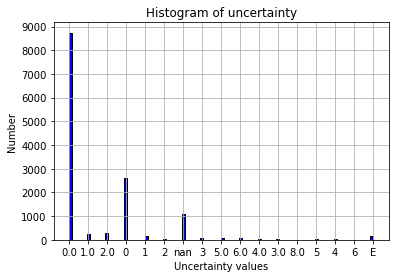

In [19]:
desjt = pd.read_csv('DES_Trojans_mpc(2).csv')
u = desjt['U'].values.tolist()
plt.hist(u, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of uncertainty')
plt.xlabel('Uncertainty values')
plt.ylabel('Number')
plt.yticks(np.arange(0, 10000, 1000.0))
plt.grid()
#len(u[u<2])
#About > 11000 smaller than 2 u uncertainty. Good.

In [20]:
desjt

,expnum,Principal_desig,ra,dec,ccd,BAND,DATE_OBS,U,RA_3sigma,DEC_3sigma,Ln
0,398230,1971 FF,33.360533,4.091682,51,b'z',b'2015-01-15T01:12:19.639544',0.0,0.085,0.052,L5
1,398232,1971 FF,33.360668,4.091818,21,b'z',b'2015-01-15T01:17:01.220886',0.0,0.085,0.052,L5
2,229724,1971 FF,8.352986,-3.065867,47,b'g',b'2013-09-02T08:22:25.719124',0.0,0.085,0.052,L5
3,231945,1971 FF,7.702020,-3.504681,5,b'g',b'2013-09-09T05:22:28.403233',0.0,0.085,0.052,L5
4,233119,1971 FF,7.399927,-3.696635,37,b'Y',b'2013-09-12T03:49:10.587528',0.0,0.085,0.052,L5
...,...,...,...,...,...,...,...,...,...,...,...
13727,243514,2019 GH23,1.635546,0.945336,46,b'i',b'2013-10-13T02:46:38.912962',NaN,5225180.900,2171127.900,L5
13728,257225,2019 GH23,358.915776,-0.080070,30,b'g',b'2013-11-22T01:35:45.448902',NaN,5225180.900,2171127.900,L5
13729,257259,2019 GH23,358.915045,-0.080159,30,b'z',b'2013-11-22T02:51:12.559943',NaN,5225180.900,2171127.900,L5
13730,257466,2019 GH23,358.905774,-0.081153,33,b'r',b'2013-11-23T02:06:45.168531',NaN,5225180.900,2171127.900,L5


### Separate JTs with L4 and L5

In [21]:
JT = pd.read_csv('DES JTs/List of Jupiter Trojans.csv')
desjt = pd.read_csv('DES_Trojans_mpc(2).csv')

In [22]:
desjt

,expnum,Principal_desig,ra,dec,ccd,BAND,DATE_OBS,U,RA_3sigma,DEC_3sigma,Ln
0,398230,1971 FF,33.360533,4.091682,51,b'z',b'2015-01-15T01:12:19.639544',0.0,0.085,0.052,L5
1,398232,1971 FF,33.360668,4.091818,21,b'z',b'2015-01-15T01:17:01.220886',0.0,0.085,0.052,L5
2,229724,1971 FF,8.352986,-3.065867,47,b'g',b'2013-09-02T08:22:25.719124',0.0,0.085,0.052,L5
3,231945,1971 FF,7.702020,-3.504681,5,b'g',b'2013-09-09T05:22:28.403233',0.0,0.085,0.052,L5
4,233119,1971 FF,7.399927,-3.696635,37,b'Y',b'2013-09-12T03:49:10.587528',0.0,0.085,0.052,L5
...,...,...,...,...,...,...,...,...,...,...,...
13727,243514,2019 GH23,1.635546,0.945336,46,b'i',b'2013-10-13T02:46:38.912962',NaN,5225180.900,2171127.900,L5
13728,257225,2019 GH23,358.915776,-0.080070,30,b'g',b'2013-11-22T01:35:45.448902',NaN,5225180.900,2171127.900,L5
13729,257259,2019 GH23,358.915045,-0.080159,30,b'z',b'2013-11-22T02:51:12.559943',NaN,5225180.900,2171127.900,L5
13730,257466,2019 GH23,358.905774,-0.081153,33,b'r',b'2013-11-23T02:06:45.168531',NaN,5225180.900,2171127.900,L5


In [23]:
a = JT.values.tolist()
for i in a:
    name = i[4]
    Ln = i[5]
    desjt.loc[desjt['Principal_desig'] == name, 'Ln'] = Ln

In [24]:
len(desjt.loc[desjt['Ln']=='L5'])

11113

In [25]:
len(desjt.loc[desjt['Ln']=='L4'])

2277

In [26]:
len(desjt)

13732

In [27]:
desjt

,expnum,Principal_desig,ra,dec,ccd,BAND,DATE_OBS,U,RA_3sigma,DEC_3sigma,Ln
0,398230,1971 FF,33.360533,4.091682,51,b'z',b'2015-01-15T01:12:19.639544',0.0,0.085,0.052,L5
1,398232,1971 FF,33.360668,4.091818,21,b'z',b'2015-01-15T01:17:01.220886',0.0,0.085,0.052,L5
2,229724,1971 FF,8.352986,-3.065867,47,b'g',b'2013-09-02T08:22:25.719124',0.0,0.085,0.052,L5
3,231945,1971 FF,7.702020,-3.504681,5,b'g',b'2013-09-09T05:22:28.403233',0.0,0.085,0.052,L5
4,233119,1971 FF,7.399927,-3.696635,37,b'Y',b'2013-09-12T03:49:10.587528',0.0,0.085,0.052,L5
...,...,...,...,...,...,...,...,...,...,...,...
13727,243514,2019 GH23,1.635546,0.945336,46,b'i',b'2013-10-13T02:46:38.912962',NaN,5225180.900,2171127.900,L5
13728,257225,2019 GH23,358.915776,-0.080070,30,b'g',b'2013-11-22T01:35:45.448902',NaN,5225180.900,2171127.900,L5
13729,257259,2019 GH23,358.915045,-0.080159,30,b'z',b'2013-11-22T02:51:12.559943',NaN,5225180.900,2171127.900,L5
13730,257466,2019 GH23,358.905774,-0.081153,33,b'r',b'2013-11-23T02:06:45.168531',NaN,5225180.900,2171127.900,L5


In [28]:
#desjt[['Principal_desig','Ln']]
L4 = desjt.loc[desjt['Ln']=="L4"]
nume = L4.groupby('Principal_desig').size()

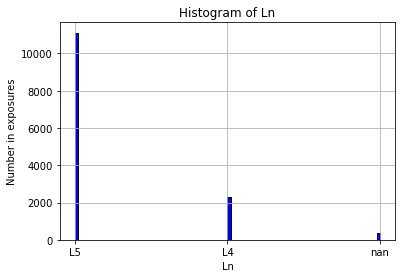

In [29]:
l = desjt['Ln'].values.tolist()
plt.hist(l, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()
# L5 11113
# L4 2277
# 385 nan

In [67]:
num = desjt['Principal_desig'].unique()
len(num)

1088

In [33]:
# Now for each object
a = JT.values.tolist()
lobj = []
def give_Ln(name):
    for n in a:
        na = n[4]
        Ln = n[5]
        if na == name:
            return Ln
            
for i in num:
    Ln = give_Ln(i)
    if isinstance(Ln, basestring) == True:
        lobj.append(Ln)

NameError: name 'JT' is not defined

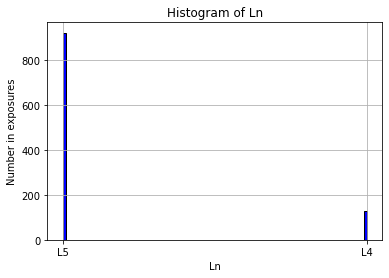

In [86]:
plt.hist(lobj, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

In [129]:
desjt

,expnum,Principal_desig,ra,dec,ccd,BAND,DATE_OBS,U,RA_3sigma,DEC_3sigma,Ln
0,157460,2001 XO128,34.570048,-5.635341,58,b'g',b'2012-12-03T01:54:00.378837',0.0,0.102,0.090,L5
1,157460,2020 HS92,34.224163,-5.320325,47,b'g',b'2012-12-03T01:54:00.378837',5.0,24.284,6.103,L5
2,157461,2001 XO128,34.569808,-5.635227,58,b'r',b'2012-12-03T01:57:23.095488',0.0,0.102,0.090,L5
3,157461,2020 HS92,34.223969,-5.320304,47,b'r',b'2012-12-03T01:57:23.095488',5.0,24.284,6.103,L5
4,157462,2001 XO128,34.569596,-5.635126,58,b'i',b'2012-12-03T02:00:22.145094',0.0,0.102,0.090,L5
...,...,...,...,...,...,...,...,...,...,...,...
13770,397707,2006 AN97,35.770972,-4.227069,13,b'g',b'2015-01-14T01:03:29.030379',0.0,0.172,0.096,L5
13771,397707,2006 BH185,36.941394,-4.456668,30,b'g',b'2015-01-14T01:03:29.030379',0.0,0.195,0.104,L5
13772,397708,2006 AN97,35.771034,-4.226834,13,b'g',b'2015-01-14T01:07:16.506021',0.0,0.172,0.096,L5
13773,397708,2006 BH185,36.941465,-4.456469,30,b'g',b'2015-01-14T01:07:16.506021',0.0,0.195,0.104,L5


In [10]:
goodna = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)]['Principal_desig'].unique()
len(goodna)

964

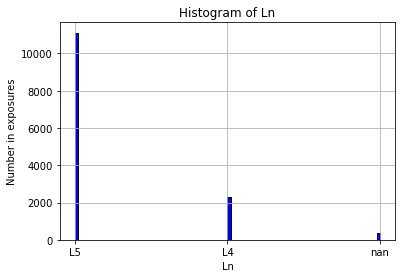

In [31]:
l = desjt['Ln'].values.tolist()
plt.hist(l, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

In [31]:
lobj = []
a = JT.values.tolist()
def give_Ln(name):
    for n in a:
        na = n[4]
        Ln = n[5]
        if na == name:
            return Ln
            
for i in goodna:
    Ln = give_Ln(i)
    if isinstance(Ln, basestring) == True:
        lobj.append(Ln)

NameError: name 'goodna' is not defined

946

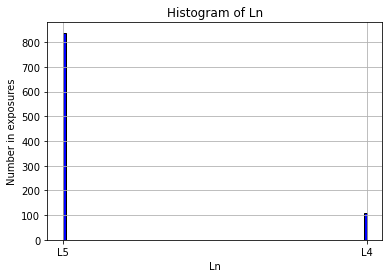

In [101]:
plt.hist(lobj, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()
len(lobj) #18 nan 

In [30]:
print(lobj.count('L5'))
print(lobj.count('L4'))

NameError: name 'lobj' is not defined

In [45]:
bb = []
for i in goodna:
    if i == '2020 ST70':
        bb.append(i)
bb
    

[]

In [6]:
desjt.groupby('Principal_desig').Principal_desig.count() <2

Principal_desig
1971 FF     False
1973 UF5    False
1975 QD     False
1983 PV     False
1985 VO     False
            ...  
2021 KL4    False
2021 LR4     True
3365 T-3    False
4101 T-3    False
5191 T-3    False
Name: Principal_desig, Length: 1088, dtype: bool

In [7]:
a = desjt.loc[desjt['Principal_desig']=='1995 CV']['ra'].count()
a

8

In [8]:
a = desjt.values.tolist()
badnum = []
for i in a:
    na = i[1]
  #  print(na)
    if desjt.loc[desjt['Principal_desig']==na]['expnum'].count() == 1:
        badnum.append(na)
#badnum

In [9]:
len(badnum)

151

In [136]:
desjt = pd.read_csv('DES JTs/DES_Trojans_mpc (3).csv')
nume = desjt.groupby('Principal_desig').size()
len(nume[nume==1])
nume[nume==1]
desjt.to_csv('DES_Trojans_mpc.csv', index=None)

In [135]:
desjt = pd.read_csv('DES_Trojans_mpc.csv')
nume = desjt.groupby('Principal_desig').size()
len(nume[nume==1])
nume[nume==1]

Principal_desig
1988 RE12     1
1988 RL13     1
1995 CV       1
1996 RT29     1
1996 TY68     1
             ..
2020 HJ99     1
2020 RQ107    1
2020 ST70     1
2021 GN101    1
2021 GZ63     1
Length: 119, dtype: int64

In [11]:
bb = []

for i in goodna:
    for b in badnum:
        if i == b:
            bb.append(i)
bb

['2010 BM90',
 '2010 XF85',
 '2013 CF115',
 '1988 RE12',
 '2008 KH35',
 '2012 TJ25',
 '2008 KV8',
 '2010 VS',
 '2013 TH32',
 '2012 TP52',
 '2012 TS256',
 '2000 SJ49',
 '2000 SL47',
 '2011 LA20',
 '2000 SA97',
 '2005 XS92',
 '2011 QW53',
 '2006 DB20',
 '2012 PK44',
 '2018 AV40',
 '2011 OT5',
 '2006 BG203',
 '2015 XR446',
 '2000 SB132',
 '2006 EP74',
 '2015 AY259',
 '2008 HL75',
 '2016 CU31',
 '2017 DG116',
 '2011 QB108',
 '2001 WB53',
 '2008 KY36',
 '2012 TY122',
 '2017 DD21',
 '2000 SA89',
 '2016 AW60',
 '2001 VK85',
 '2011 QV76',
 '2005 EQ272',
 '2011 KT21',
 '2014 WB18',
 '2011 KG17',
 '2014 VF8',
 '2002 CB94',
 '1996 TY68',
 '1999 WB2',
 '2013 CJ194',
 '2009 UE72',
 '2000 XN9',
 '2003 JG8',
 '2003 HQ35',
 '2008 SE276',
 '2009 UX143',
 '2013 AF',
 '2008 RQ175',
 '2009 VG58',
 '1999 YC13',
 '2013 FM1',
 '2001 CN33',
 '2009 WU112',
 '1996 RT29',
 '2006 BZ55',
 '2008 FQ132',
 '2000 SK47',
 '2000 QN116',
 '2007 EO34',
 '2014 WB546',
 '2009 FB63',
 '2004 YD23',
 '2016 AD303',
 '2001 RH142

In [12]:
len(bb)

125

In [16]:
goodna[goodna=='2011 OJ63']
#So there are many one exposures in the very accuarte measured JTs. Would make the good nubmer go down by 125
#964 - 125 = 839
# Probably eventually have 700 or so good enough JTs....

array(['2011 OJ63'], dtype=object)

### Distinguish all L4 and L5 JTs

L4, existing 60° ahead of the planet in its orbit, or L5, 60° behind. 

In [97]:
desjt = pd.read_csv('DES_Trojans_mpc(2).csv')
len(desjt.loc[(desjt['Ln']!='L5')&(desjt['Ln']!='L4')]['DATE_OBS'].unique())
nandate = desjt.loc[(desjt['Ln']!='L5')&(desjt['Ln']!='L4')]['DATE_OBS'].unique()
nanna = desjt.loc[(desjt['Ln']!='L5')&(desjt['Ln']!='L4')]['Principal_desig'].unique()
print(len(nandate))
print(len(nanna))
#print(nandate)

335
36


In [96]:
desjtl = pd.read_csv('DES_Trojans_mpcL.csv')
len(desjt.loc[(desjtl['Ln2']!='L5')&(desjtl['Ln2']!='L4')]['DATE_OBS'].unique())
nandate = desjt.loc[(desjtl['Ln2']!='L5')&(desjtl['Ln2']!='L4')]['DATE_OBS'].unique()
nanna = desjt.loc[(desjtl['Ln2']!='L5')&(desjtl['Ln2']!='L4')]['Principal_desig'].unique()
print(len(nandate))
print(len(nanna))
print(nanna)

0
0
[]


### Some jupiter trojans are nearly opposite to Jupiter. I don't know how to deal with them
e.g. '2017 PC52' '2020 BZ43' '2010 HW38' '2010 JR42' '2010 LU' '2010 LD94']\
They may switch between L4 and L5???

In [47]:
desjt.loc[(desjt['Ln']!='L5')&(desjt['Ln']!='L4')]['Principal_desig'].unique()

array(['2006 UG185', '2014 UQ194', '2009 JG23', '2013 RE149',
       '2013 RW149', '2013 RZ149', '2013 SP94', '2014 WS591',
       '2014 WX591', '2014 WD592', '2017 BG181', '2017 PC52', '2018 BG26',
       '2019 AN81', '2020 BZ43', '2020 HT115', '2020 HU115', '2020 HF116',
       '2020 HG116', '2020 HH116', '2021 GT104', '2021 GD110',
       '2021 HE15', '2021 JM20', '2021 JX20', '2021 JY20', '2021 JZ20',
       '2021 JW21', '2021 JX21', '2021 KL4', '2021 LR4', '2010 CL191',
       '2010 HW38', '2010 JR42', '2010 LU', '2010 LD94'], dtype=object)

If L4, ra JTs - ra Jup should be bigger or equal to 60 smaller 100 or be smaller than -250
If L5, ra JTs - ra Jup should be smaller than -60 bigger than -100? or bigger than 200.

In [137]:
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon
datejt = desjt['DATE_OBS']
datejt = datejt.values.tolist()
a = desjt.values.tolist()
for i in a:
    date = i[6]
    ra = i[2]
    name = i[1]
    d = date.replace("T"," ")
    c = d.replace("b","")
    e = eval(c)
    t = Time(e, format='iso', scale='utc')
    loc = EarthLocation.of_site('Cerro Tololo Interamerican Observatory') 
    jup = get_body('jupiter', t, loc) 
    jupra = jup.ra.deg
    if ((ra - jupra>=20)&(ra - jupra<=180))|(ra - jupra<=-210):
        desjt.loc[desjt['Principal_desig'] == name, 'Ln2'] = 'L4'
    elif ((ra - jupra<=-20)&(ra - jupra >=-180))|(ra - jupra>=190):
        desjt.loc[desjt['Principal_desig'] == name, 'Ln2'] = 'L5'



In [138]:
desjt
desjt.to_csv('DES_Trojans_mpcL.csv', index=None)

In [135]:
t = Time('2017-11-18 03:44:12.807217', format='iso', scale='utc')
loc = EarthLocation.of_site('Cerro Tololo Interamerican Observatory') 
jup = get_body('jupiter', t, loc) 
jupra = jup.ra.deg
print(jupra)

216.09353939347653


In [122]:
# Now check the Ln I get is the same with the list in mpc
jtl = desjt.loc[(desjtl['Ln2']=='L5')|(desjtl['Ln2']=='L4')]
#jtll = desjtl.loc[(desjtl['Ln2']=='L5')|(desjtl['Ln2']=='L4')]
jtll = pd.read_csv('DES_Trojans_mpcL.csv')
jtl = jtl.values.tolist()
jtll = jtll.values.tolist()
#print(jtll)
correct = []
for i in jtll:
    ln = i[10]
    ln2 = i[11]
    if (ln =='L5')|(ln=='L4'):
        correct.append(bool(ln==ln2))
#print(correct)
print(len(correct))
for i in correct:
    if i == False:
        print('...')

13390


In [139]:
#print(len(desjt.loc[(desjt['Ln']=='L5')|(desjt['Ln']=='L4')]))
jtll = pd.read_csv('DES_Trojans_mpcL.csv')
Ln2 = jtll['Ln2'].values.tolist()
#print(Ln2)
desjt['Ln2']=Ln2
desjt.to_csv('DES_Trojans_mpc(2).csv', index=None)

In [140]:
goodg = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'g'")]['Principal_desig'].unique()
goodr = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'r'")]['Principal_desig'].unique()
goodi = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'i'")]['Principal_desig'].unique()
goodz = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'z'")]['Principal_desig'].unique()
goodu = desjt.loc[(desjt['RA_3sigma']<2)&(desjt['DEC_3sigma']<2)&(desjt['BAND']=="b'u'")]['Principal_desig'].unique()
print(len(goodg))
print(len(goodr))
print(len(goodi))
print(len(goodz))
print(len(goodu))

652
507
604
658
82


g-r 462
r-i 456
z-i 524
u-g 19
z-r 416
z-g 489
g-r&r-i 421
g-r&z-i 365
r-i&z-i 395
g-r&z-g 381
g-r&z-r 381


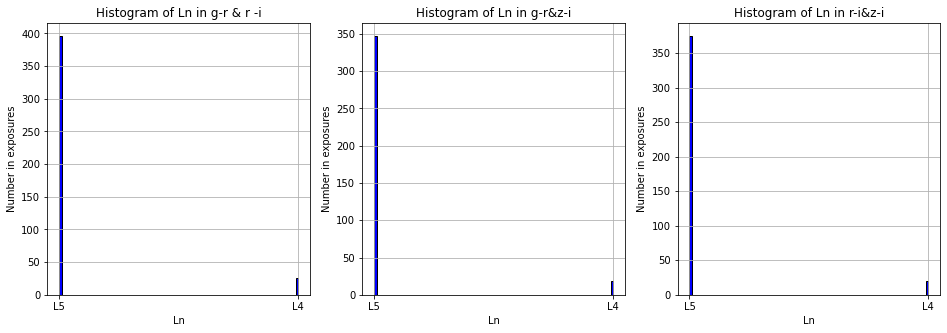

In [141]:
grgood = []
for i in goodg:
    for a in goodr:
        if i == a: 
            grgood.append(i)
print('g-r',len(grgood))

rigood = []
for i in goodi:
    for a in goodr:
        if i == a: 
            rigood.append(i)
print('r-i',len(rigood))

zigood = []
for i in goodz:
    for a in goodi:
        if i == a: 
            zigood.append(i)
print('z-i',len(zigood))

uggood = []
for i in goodu:
    for a in goodg:
        if i == a: 
            uggood.append(i)
print('u-g',len(uggood))

zrgood = []
for i in goodz:
    for a in goodr:
        if i == a: 
            zrgood.append(i)
print('z-r',len(zrgood))

zggood = []
for i in goodz:
    for a in goodg:
        if i == a: 
            zggood.append(i)
print('z-g',len(zggood))

grrigood = []
for i in grgood:
    for a in rigood:
        if i == a: 
            grrigood.append(i)
LL = []
for b in grrigood:
    l = desjt.loc[desjt['Principal_desig'] == b]['Ln2'].unique()
    l = l[0]
    LL.append(l)
#print(LL)
print('g-r&r-i',len(grrigood))
plt.figure(figsize=(16,5),frameon=False)
ax2=plt.subplot(131)
plt.hist(LL, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln in g-r & r -i')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

grzigood = []
for i in grgood:
    for a in zigood:
        if i == a: 
            grzigood.append(i)
print('g-r&z-i',len(grzigood))
LL = []
for b in grzigood:
    l = desjt.loc[desjt['Principal_desig'] == b]['Ln2'].unique()
    l = l[0]
    LL.append(l)
ax2=plt.subplot(132)
plt.hist(LL, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln in g-r&z-i')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

rizigood = []
for i in rigood:
    for a in zigood:
        if i == a: 
            rizigood.append(i)
print('r-i&z-i',len(rizigood))
LL = []
for b in rizigood:
    l = desjt.loc[desjt['Principal_desig'] == b]['Ln2'].unique()
    l = l[0]
    LL.append(l)
ax2=plt.subplot(133)
plt.hist(LL, color = 'blue', edgecolor = 'black',bins = 100)
plt.title('Histogram of Ln in r-i&z-i')
plt.xlabel('Ln')
plt.ylabel('Number in exposures')
plt.grid()

grzggood = []
for i in grgood:
    for a in zggood:
        if i == a: 
            grzggood.append(i)
print('g-r&z-g',len(grzggood))

grzrgood = []
for i in grgood:
    for a in zrgood:
        if i == a: 
            grzrgood.append(i)
print('g-r&z-r',len(grzrgood))